In [1]:
import numpy as np
import pandas as pd
#import pyreadr
from matplotlib import pyplot as plt
import seaborn as sns
import tabulate as tabulate
import csv
from IPython.display import display, HTML
plt.xkcd()

# Investment model A

In [2]:
lumpSum=194000
interestRate=0.03             # expected interest rate
#interestRate=0.1
chargesRate =0.0125            # charges for maintaing the trust
#chargesRate =0.0

In [3]:
year=[]
trustLumpSum=[]
withdrawals=[]

In [4]:
yearsTillUni=7
yearsUniStudy=5
fixedWithdrawal=lumpSum*0.05

In [5]:
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)

totalWithdrawals=0

print("\nInitial balance is £{:.2f}".format(lumpSum))
for iYear in range(yearsTillUni+yearsUniStudy):
    print("\nAnother year passed by, year={}".format(iYear+1))

    newStatement=trustLumpSum[-1]*(1+(interestRate-chargesRate))
    year.append(year[-1]+1)
    
    print("Current account balance is £{:.2f}".format(newStatement))
    
    if not iYear < yearsTillUni:
        print("Withdrawing £{} at the end of the year".format(fixedWithdrawal))
        totalWithdrawals += fixedWithdrawal
        newStatement -= fixedWithdrawal
        print("Balance after withdrawal is £{:.2f} ".format(newStatement))
    
    trustLumpSum.append(newStatement)
    withdrawals.append(0)
    
print("\n\nFinal summary:")
print("\tBalance is £{:.2f} total withdrawals are £{:.2f}".format(trustLumpSum[-1],totalWithdrawals))        


Initial balance is £194000.00

Another year passed by, year=1
Current account balance is £197395.00

Another year passed by, year=2
Current account balance is £200849.41

Another year passed by, year=3
Current account balance is £204364.28

Another year passed by, year=4
Current account balance is £207940.65

Another year passed by, year=5
Current account balance is £211579.61

Another year passed by, year=6
Current account balance is £215282.26

Another year passed by, year=7
Current account balance is £219049.70

Another year passed by, year=8
Current account balance is £222883.07
Withdrawing £9700.0 at the end of the year
Balance after withdrawal is £213183.07 

Another year passed by, year=9
Current account balance is £216913.77
Withdrawing £9700.0 at the end of the year
Balance after withdrawal is £207213.77 

Another year passed by, year=10
Current account balance is £210840.01
Withdrawing £9700.0 at the end of the year
Balance after withdrawal is £201140.01 

Another year passe

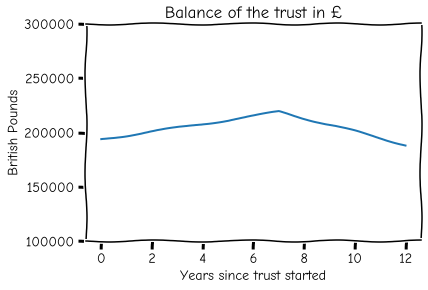

In [6]:
plt.plot(year,trustLumpSum)
plt.title("Balance of the trust in £")
plt.ylim([100000,300000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

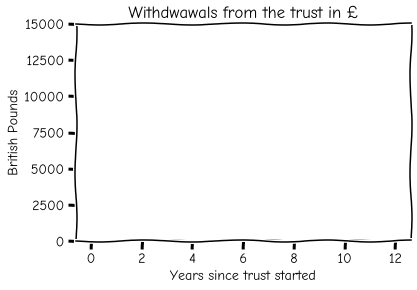

In [7]:
plt.plot(year,withdrawals)
plt.title("Withdwawals from the trust in £")
plt.ylim([0,15000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

# Investment model B

In [8]:
lumpSum=198000
year=[]
trustLumpSum=[]
withdrawals=[]

In [9]:
interestRate=0.03             # expected interest rate
freeChargesRate=0.007         # charges without limit
restrictedChargesRate=0.0014
restrictedCeiling=375

In [10]:
taxRate=0.45                  # tax on capital gains
taxEscape=2000                # tax escape on capital gains

In [11]:
yearsTillUni=7
yearsUniStudy=5
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)
fixedWithdrawal=lumpSum*0.05

In [12]:
print("\nInitial balance is £{:.2f}".format(lumpSum))
totalTax=0
totalWithdrawals=0
for iYear in range(yearsTillUni+yearsUniStudy):
    accountBalance=trustLumpSum[-1]
    print("\nAnother year passed by, year={}".format(iYear+1))
#    print("Current account balance after {} years is £{:.2f}".format(year[-1],accountBalance))
        
    interestGain=accountBalance*interestRate
    freeInterestCharge=accountBalance*freeChargesRate
    restrictedInterestCharge=accountBalance*restrictedChargesRate
    if restrictedInterestCharge > restrictedCeiling:
        restrictedInterestCharge=restrictedCeiling
    totalGain = interestGain-freeInterestCharge-restrictedInterestCharge    
    print("Interest Gain=£{:.2f} Free Interest Charge=£{:.2f} restricted Interest Charge=£{:.2f}, Total Gain={:.2f}"
          .format(interestGain,freeInterestCharge,restrictedInterestCharge,totalGain))
    
    taxDeduction = totalGain - taxEscape
    if taxDeduction > 0:
        taxDeduction = taxDeduction * taxRate
    else:
        taxDeduction = 0
        
    totalTax=totalTax+taxDeduction
    totalGain=totalGain-taxDeduction

    print("Tax deduction=£{:.2f} Gain after taxation=£{:.2f}".format(taxDeduction,totalGain))
          
    newStatement=accountBalance+totalGain

    print("Remaining balance is £{:.2f} ".format(newStatement))

    if not iYear < yearsTillUni:
        print("Withdrawing £{} at the end of the year".format(fixedWithdrawal))
        totalWithdrawals += fixedWithdrawal
        newStatement -= fixedWithdrawal
        print("Balance after withdrawal is £{:.2f} ".format(newStatement))

    year.append(year[-1]+1)
    trustLumpSum.append(newStatement)
    
print("\n\nFinal summary:")
print("\tBalance is £{:.2f} total tax paid is £{:.2f}  total withdrawals are £{:.2f}".format(trustLumpSum[-1],
                                                                totalTax,totalWithdrawals))    


Initial balance is £198000.00

Another year passed by, year=1
Interest Gain=£5940.00 Free Interest Charge=£1386.00 restricted Interest Charge=£277.20, Total Gain=4276.80
Tax deduction=£1024.56 Gain after taxation=£3252.24
Remaining balance is £201252.24 

Another year passed by, year=2
Interest Gain=£6037.57 Free Interest Charge=£1408.77 restricted Interest Charge=£281.75, Total Gain=4347.05
Tax deduction=£1056.17 Gain after taxation=£3290.88
Remaining balance is £204543.12 

Another year passed by, year=3
Interest Gain=£6136.29 Free Interest Charge=£1431.80 restricted Interest Charge=£286.36, Total Gain=4418.13
Tax deduction=£1088.16 Gain after taxation=£3329.97
Remaining balance is £207873.09 

Another year passed by, year=4
Interest Gain=£6236.19 Free Interest Charge=£1455.11 restricted Interest Charge=£291.02, Total Gain=4490.06
Tax deduction=£1120.53 Gain after taxation=£3369.53
Remaining balance is £211242.62 

Another year passed by, year=5
Interest Gain=£6337.28 Free Interest 

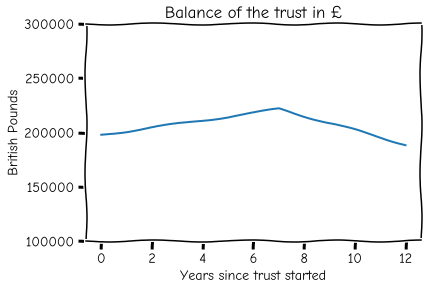

In [13]:
plt.plot(year,trustLumpSum)
plt.title("Balance of the trust in £")
plt.ylim([100000,300000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

# Investment model C


In [14]:
lumpSum=198000
year=[]
trustLumpSum=[]
withdrawals=[]
taxPayments=[]

In [15]:
yearsTillUni=7
yearsUniStudy=5
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)
taxPayments.append(0)
fixedWithdrawal=lumpSum*0.05

In [16]:
interestRate=0.03             # expected interest rate
chargesRate =0.0125           # charges for maintaing the trust
taxRate=0.2                   # tax on gain
totalTaxAmount=0
totalWithdrawals=0


In [17]:
print("\nInitial balance is £{:.2f}".format(lumpSum))
for iYear in range(yearsTillUni+yearsUniStudy):
    print("\nAnother year passed by, year={}".format(iYear+1))
    accountBalance=trustLumpSum[-1]
    interestGain=accountBalance*interestRate
    interestCharge=accountBalance*chargesRate

    totalGain=interestGain-interestCharge
    taxAmount=totalGain*taxRate
    taxPayments.append(taxAmount)
    totalTaxAmount+=taxAmount
    
    accountBalance = accountBalance+totalGain-taxAmount 
    print("At the end of the year we paid tax £{:.2f} and remaining balance is £{:.2f} ".format(taxAmount,accountBalance))

    if not iYear < yearsTillUni:
        accountBalance -= fixedWithdrawal    
        totalWithdrawals += fixedWithdrawal
        print("withdrawing £{:.2f}, new balance is £{:.2f}".format(fixedWithdrawal,accountBalance))

    trustLumpSum.append(accountBalance)    


Initial balance is £198000.00

Another year passed by, year=1
At the end of the year we paid tax £693.00 and remaining balance is £200772.00 

Another year passed by, year=2
At the end of the year we paid tax £702.70 and remaining balance is £203582.81 

Another year passed by, year=3
At the end of the year we paid tax £712.54 and remaining balance is £206432.97 

Another year passed by, year=4
At the end of the year we paid tax £722.52 and remaining balance is £209323.03 

Another year passed by, year=5
At the end of the year we paid tax £732.63 and remaining balance is £212253.55 

Another year passed by, year=6
At the end of the year we paid tax £742.89 and remaining balance is £215225.10 

Another year passed by, year=7
At the end of the year we paid tax £753.29 and remaining balance is £218238.25 

Another year passed by, year=8
At the end of the year we paid tax £763.83 and remaining balance is £221293.59 
withdrawing £9900.00, new balance is £211393.59

Another year passed by, 

In [18]:
print("\n\nFinal summary:")
print("\tBalance is £{:.2f} total tax paid is £{:.2f}  total withdrawals are £{:.2f}".format(trustLumpSum[-1],
                                                                totalTaxAmount,totalWithdrawals))



Final summary:
	Balance is £183043.17 total tax paid is £8635.79  total withdrawals are £49500.00
